# Electricity Demand & Price Forecasting

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Datasets

In [2]:
df_energy=pd.read_excel("energy_dataset.xlsx")
df_weather=pd.read_excel("weather_features.xlsx")

In [3]:
df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [4]:
df_energy.shape

(35064, 29)

In [5]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [6]:
df_weather.shape

(178396, 17)

Merging the dataset

In [7]:
df_weather=df_weather.drop(columns=['city_name'])

In [8]:
df_energy['time'] = pd.to_datetime(df_energy['time'],utc=True)
df_weather['dt_iso'] = pd.to_datetime(df_weather['dt_iso'],utc=True)

In [9]:
df_weather_agg  = df_weather.groupby('dt_iso').agg({
    'temp' : 'mean',
    'temp_min' 	: 'mean',
    'temp_max'	: 'mean',
    'pressure'	: 'mean',
    'humidity'	: 'mean',
    'wind_speed' :	'mean',
    'wind_deg'	: 'mean',
    'rain_1h'	: 'mean',
    'rain_3h'	: 'mean',
    'snow_3h'	: 'mean',
    'clouds_all' :	'mean',
    'weather_id'	: lambda x: x.mode()[0],
    'weather_main' :	lambda x: x.mode()[0],
    'weather_description' : lambda x: x.mode()[0],
    'weather_icon' : lambda x: x.mode()[0],
    }
).reset_index()

C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\1603468826.py:16: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  'weather_icon' : lambda x: x.mode()[0],
C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\1603468826.py:16: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  'weather_icon' : lambda x: x.mode()[0],


In [10]:
merged_df = pd.merge(df_energy, df_weather_agg, left_on='time', right_on='dt_iso')

In [11]:
merged_df =  merged_df.drop(columns=['dt_iso'])

In [12]:
merged_df.shape

(35064, 44)

In [13]:
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,2.0,135.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,2.0,135.8,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,2.4,119.0,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,2.4,119.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,2.4,118.4,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n


In [14]:
merged_df.to_csv('Merged_Data.csv')

# EDA:Exploratary Data Analysis

In [15]:
merged_df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 

In [16]:
# Display information about the dataframe
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [17]:
# Summary statistics
merged_df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,291.147454,1070.205996,68.217013,2.467529,166.614552,0.073212,0.000386,0.004846,24.737415,766.310375
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,7.507959,2692.266470,14.890167,1.357751,57.493555,0.202562,0.003360,0.101103,17.306731,102.859365
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,271.941863,812.400000,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,285.350000,1012.800000,56.800000,1.400000,126.400000,0.000000,0.000000,0.000000,12.000000,800.000000
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,290.550000,1017.000000,69.800000,2.200000,166.000000,0.000000,0.000000,0.000000,22.400000,800.000000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,296.750000,1021.000000,80.200000,3.200000,207.800000,0.060000,0.000000,0.000000,35.000000,800.000000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,313.548000,202469.000000,100.000000,29.800000,338.000000,4.150000,0.463000,4.300000,93.600000,804.000000


In [18]:
# Check for missing values
print(merged_df.isnull().sum())

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [19]:
# Handle missing values
threshold = 0.5  # If more than 50% of the values are missing, drop the column
merged_df = merged_df.loc[:, merged_df.isnull().mean() < threshold]

In [20]:
# Fill missing numeric values with the mean
numeric_cols = merged_df.select_dtypes(include=np.number).columns
merged_df.loc[:, numeric_cols] = merged_df.loc[:, numeric_cols].fillna(merged_df[numeric_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = merged_df.select_dtypes(include='object').columns
for col in categorical_cols:
    merged_df.loc[:, col] = merged_df[col].fillna(merged_df[col].mode()[0])

In [21]:
print(merged_df.isnull().sum())

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

outliers detection

In [22]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Detect outliers in numeric columns
outliers_dict = {col: detect_outliers_iqr(merged_df, col) for col in numeric_cols}

# Print the number of outliers detected for each numeric feature
for col, outliers in outliers_dict.items():
    print(f'{col}: {len(outliers)} outliers detected')

# Function to cap outliers
def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Explicitly cast bounds to match the data type of the feature
    if np.issubdtype(df[feature].dtype, np.integer):
        lower_bound = int(lower_bound)
        upper_bound = int(upper_bound)
    elif np.issubdtype(df[feature].dtype, np.floating):
        lower_bound = float(lower_bound)
        upper_bound = float(upper_bound)
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound
    return df

# Cap outliers in numeric columns
for col in numeric_cols:
    merged_df = cap_outliers(merged_df, col)

generation biomass: 87 outliers detected
generation fossil brown coal/lignite: 0 outliers detected
generation fossil coal-derived gas: 0 outliers detected
generation fossil gas: 2187 outliers detected
generation fossil hard coal: 0 outliers detected
generation fossil oil: 246 outliers detected
generation fossil oil shale: 0 outliers detected
generation fossil peat: 0 outliers detected
generation geothermal: 0 outliers detected
generation hydro pumped storage consumption: 3772 outliers detected
generation hydro run-of-river and poundage: 0 outliers detected
generation hydro water reservoir: 344 outliers detected
generation marine: 0 outliers detected
generation nuclear: 76 outliers detected
generation other: 1267 outliers detected
generation other renewable: 5 outliers detected
generation solar: 0 outliers detected
generation waste: 328 outliers detected
generation wind offshore: 0 outliers detected
generation wind onshore: 380 outliers detected
forecast solar day ahead: 0 outliers dete

In [23]:
# Print the dataframe after outlier handling
merged_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.5,0.0,0.0,0.0,...,2.0,135.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,162.5,0.0,0.0,0.0,...,2.0,135.8,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,162.5,0.0,0.0,0.0,...,2.4,119.0,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,162.5,0.0,0.0,0.0,...,2.4,119.2,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,162.5,0.0,0.0,0.0,...,2.4,118.4,0.0,0.0,0.0,0.0,800,clear,sky is clear,01n


# Visualizations

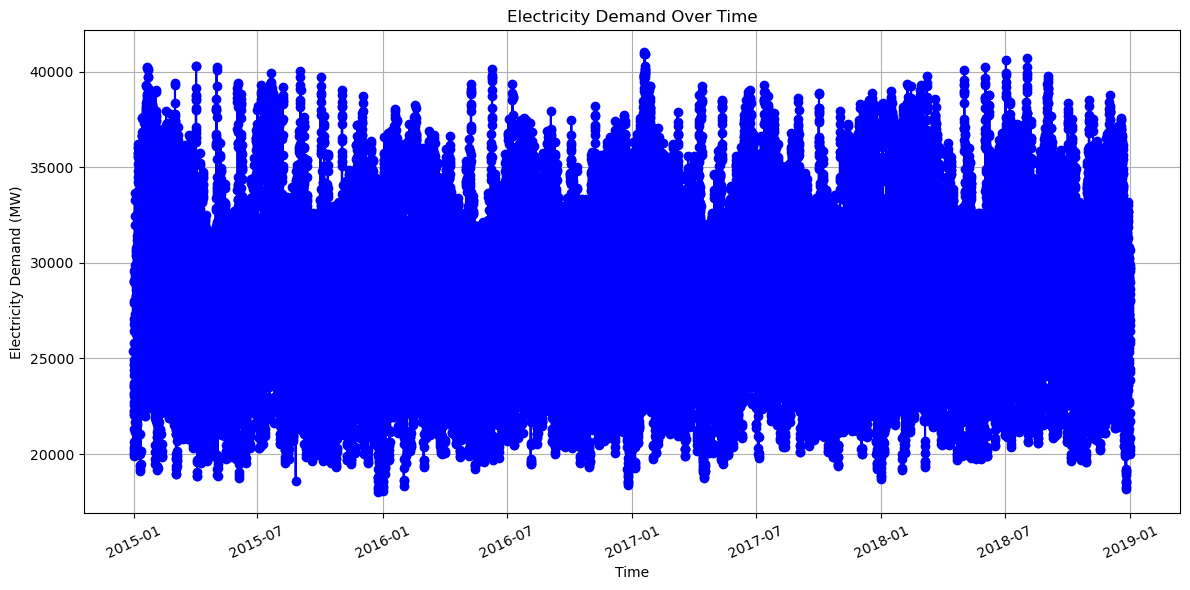

In [24]:
# Line Plot of Electricity Demand Over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df['time'], merged_df['total load actual'], marker='o', linestyle='-', color='b')
plt.title('Electricity Demand Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MW)')
plt.xticks(rotation=25)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\KUMAR PUSHPAM\anaconda3\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


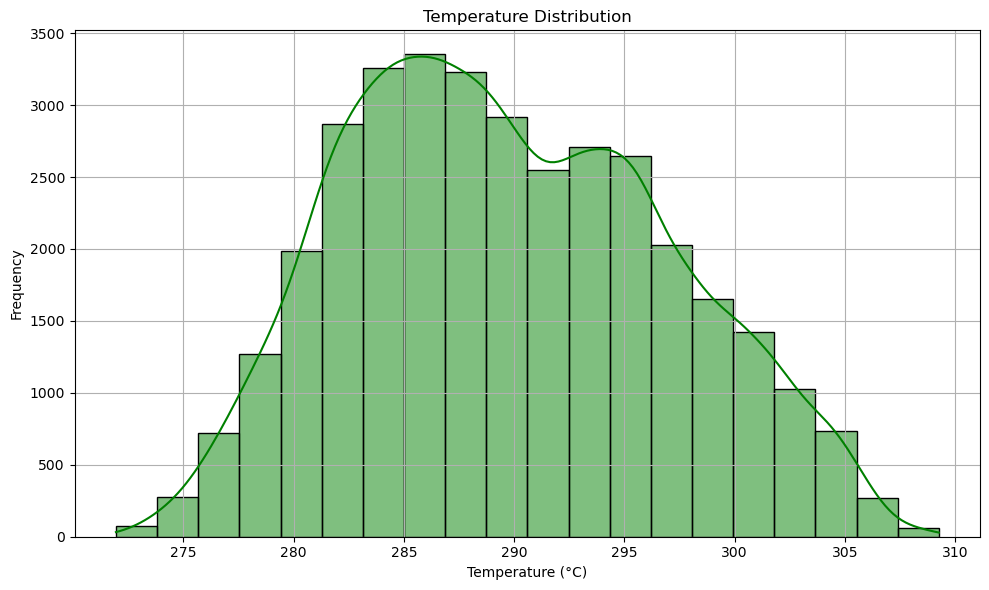

In [25]:
# Histogram of Temperature Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['temp'], bins=20, kde=True, color='g')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

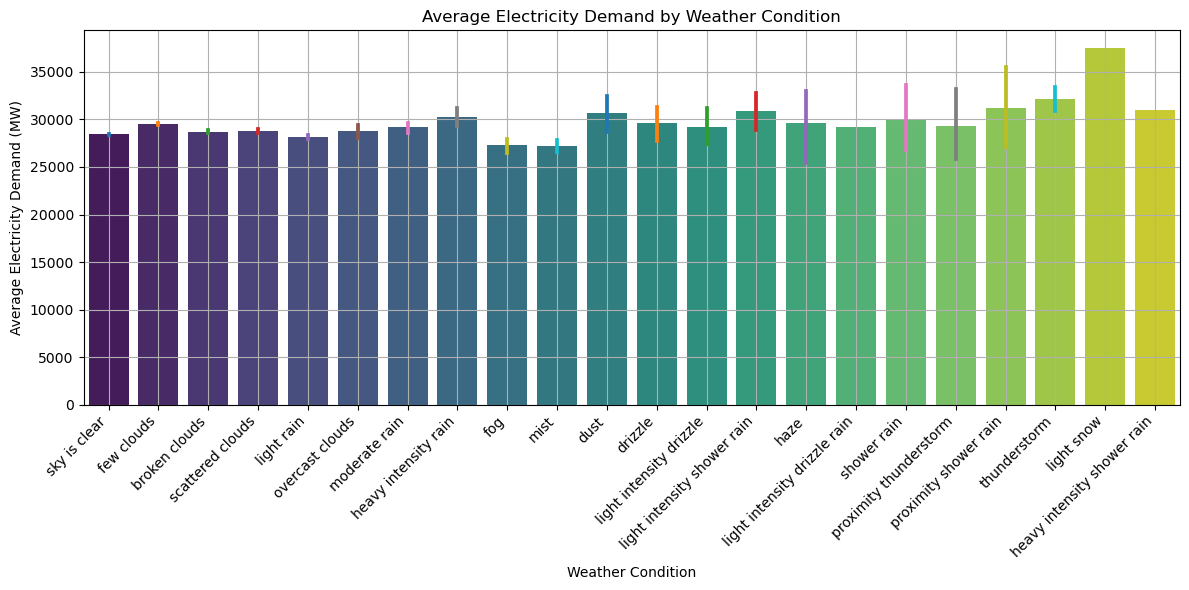

In [26]:
plt.figure(figsize=(12, 6))  # Increase figure width for better spacing
sns.barplot(x='weather_description', y='total load actual', data=merged_df, estimator=np.mean, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and adjust alignment
plt.grid(True)
plt.tight_layout()
plt.show()

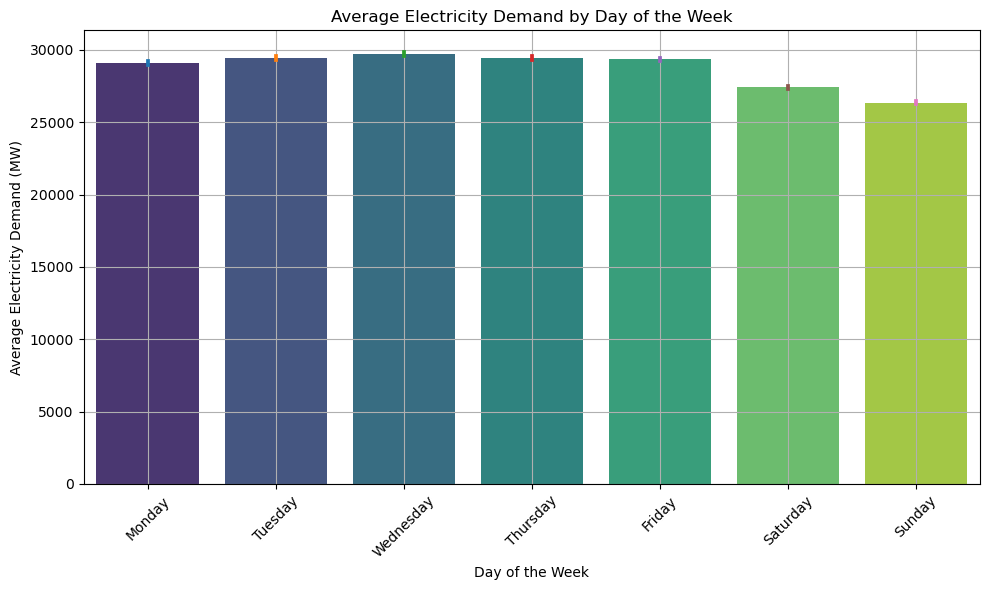

In [27]:
# Calculate day of the week
merged_df['day_of_week'] = merged_df['time'].dt.day_name()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot Average Electricity Demand by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='total load actual', data=merged_df, order=day_order, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

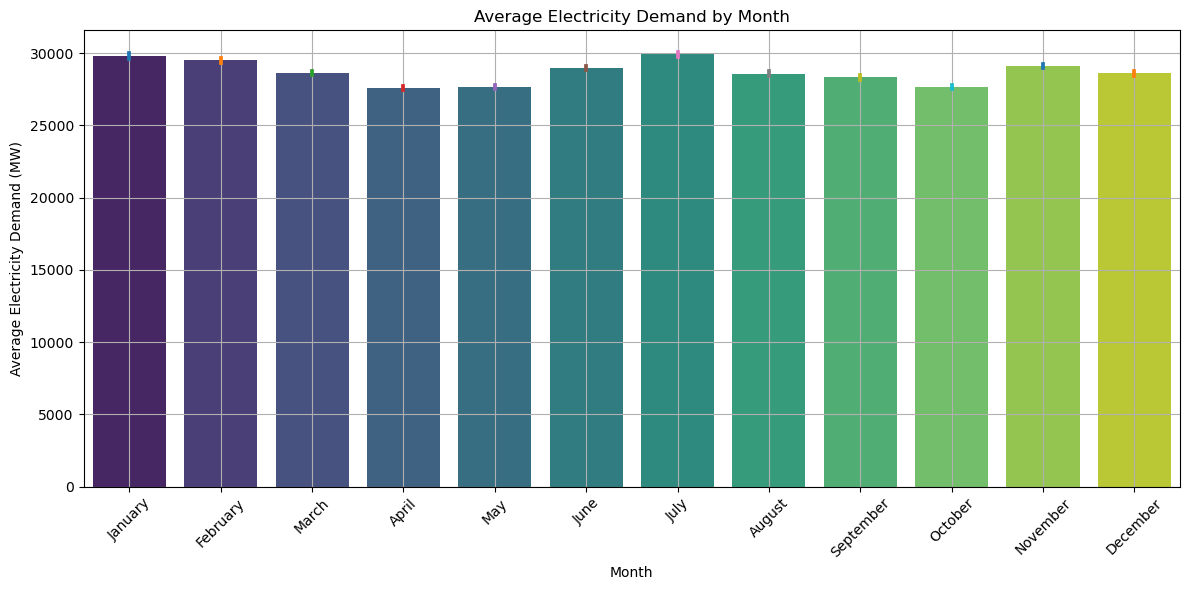

In [28]:
# Extract month from time column
merged_df['month'] = merged_df['time'].dt.month_name()

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Plot Bar Chart Comparing Electricity Demand by Month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total load actual', data=merged_df, estimator=np.mean, 
            order=month_order, errcolor=None, palette='viridis')
plt.title('Average Electricity Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Electricity Demand (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [29]:
# Hour of the Day
merged_df['hour'] = merged_df['time'].dt.hour

# Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

merged_df['season'] = merged_df['time'].dt.month.apply(get_season)

# Weather Type Simplification
merged_df['weather_type'] = merged_df['weather_main'].str.lower()

# Weekend Indicator
merged_df['is_weekend'] = merged_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Temperature Range
merged_df['temp_range'] = merged_df['temp_max'] - merged_df['temp_min']

# Rain and Snow Indicators
merged_df['is_raining'] = (merged_df['rain_1h'] > 0).astype(int)
merged_df['is_snowing'] = (merged_df['snow_3h'] > 0).astype(int)

In [30]:
merged_df

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,weather_icon,day_of_week,month,hour,season,weather_type,is_weekend,temp_range,is_raining,is_snowing
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.5,0.0,0.0,0.0,...,01n,Wednesday,December,23,Winter,clear,0,0.0,0,0
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,0,Winter,clear,0,0.0,0,0
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,1,Winter,clear,0,0.0,0,0
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,2,Winter,clear,0,0.0,0,0
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,162.5,0.0,0.0,0.0,...,01n,Thursday,January,3,Winter,clear,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,01n,Monday,December,18,Winter,clear,0,2.2,0,0
35060,2018-12-31 19:00:00+00:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,01n,Monday,December,19,Winter,clear,0,2.4,0,0
35061,2018-12-31 20:00:00+00:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,01n,Monday,December,20,Winter,clear,0,1.0,0,0
35062,2018-12-31 21:00:00+00:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,01n,Monday,December,21,Winter,clear,0,2.0,0,0


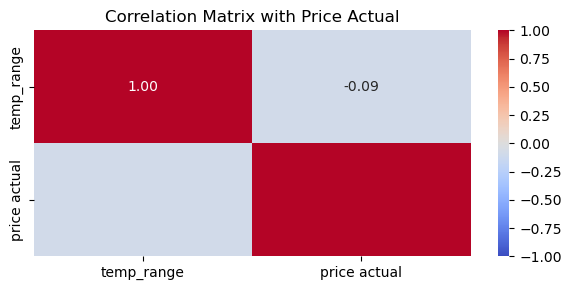

In [31]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = ['temp_range']

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Calculate the correlation matrix
correlation_matrix = data_for_analysis.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Actual')
plt.tight_layout()

# Show plot
plt.show()

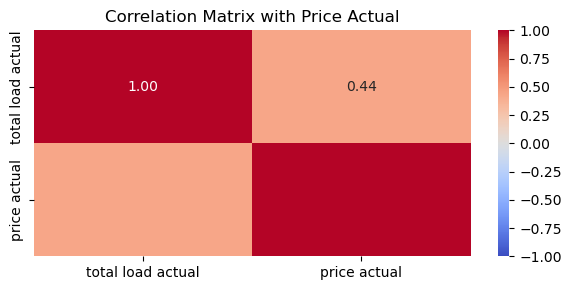

In [32]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = ['total load actual']

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Calculate the correlation matrix
correlation_matrix = data_for_analysis.corr(numeric_only=True)

# Plotting the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Price Actual')
plt.tight_layout()

# Show plot
plt.show()

# Linear Regression Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [45]:
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


### **Linear Regression model to predict price**

In [46]:
# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('price actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

price actual
Mean Absolute Error (MAE): 9.13734937430843
Mean Squared Error (MSE): 131.60245617191865
Root Mean Squared Error (RMSE): 11.47181137274836
R-squared (R2): 0.3264804609368348
Adjusted R-squared: 0.3252294602213296
Mean Absolute Percentage Error (MAPE): 18.34696829091844


### **Linear Regression model to predict demand**

In [47]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [48]:
# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('total load actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

total load actual
Mean Absolute Error (MAE): 2807.1332630292063
Mean Squared Error (MSE): 12194152.078091048
Root Mean Squared Error (RMSE): 3492.0126113877436
R-squared (R2): 0.4149327179567541
Adjusted R-squared: 0.41384600918884984
Mean Absolute Percentage Error (MAPE): 10.020559238602381


# Decision Tree

### **Decision Tree model to predict demand**

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'total load actual'
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("Decision Tree Model for Total Load Actual")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Decision Tree Model for Total Load Actual
Mean Absolute Error (MAE): 2392.668783727983
Mean Squared Error (MSE): 12087903.896257749
Root Mean Squared Error (RMSE): 3476.766298769267
R-squared (R2): 0.4200304348434354
Adjusted R-squared: 0.4189531946166837
Mean Absolute Percentage Error (MAPE): 8.47000159406473


### **Decision Tree model to predict price**

In [50]:
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'price actual'
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("Decision Tree Model for Price Actual")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Decision Tree Model for Price Actual
Mean Absolute Error (MAE): 9.317024632824754
Mean Squared Error (MSE): 166.17337524574896
Root Mean Squared Error (RMSE): 12.890825235249642
R-squared (R2): 0.14955223211123503
Adjusted R-squared: 0.1479726034524903
Mean Absolute Percentage Error (MAPE): 18.054397509728208


# RandomForest Model

### **Random Forest model to predict price**

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Define adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [38]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\2625646640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [39]:
# Fit the random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [40]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print("Random Forest Model for Price Actual")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


Random Forest Model for Price Actual
Mean Absolute Error (MAE): 6.947934671324683
Mean Squared Error (MSE): 79.79027306735175
Root Mean Squared Error (RMSE): 8.93254012402697
R-squared (R2): 0.5916466189062363
Adjusted R-squared: 0.5908881399872166
Mean Absolute Percentage Error (MAPE): 13.728993151965781


### Random Forest model to predict demand

In [41]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\3789183250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [42]:
# Fit the random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [43]:
#Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Total Load Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Total Load Actual
Mean Absolute Error (MAE): 1802.5113839543753
Mean Squared Error (MSE): 6180013.805070648
Root Mean Squared Error (RMSE): 2485.9633555365713
R-squared (R2): 0.7034870602918992
Adjusted R-squared: 0.7029363147259319
Mean Absolute Percentage Error (MAPE): 6.437864167031869


# Random Forest with Parameter Tuning

### Random Forest(tuning) model to predict demand

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
# Function to calculate adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Assuming `data_for_analysis` is your DataFrame containing all the relevant data

# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'total load actual'
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [53]:
# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [54]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAPE):", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAPE): -0.06468560451589785


In [55]:
# Predict using the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("Random Forest Model for Total Load Actual with Hyperparameter Tuning")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Random Forest Model for Total Load Actual with Hyperparameter Tuning
Mean Absolute Error (MAE): 1796.1491048971336
Mean Squared Error (MSE): 6146443.407227086
Root Mean Squared Error (RMSE): 2479.2021715114493
R-squared (R2): 0.7050977455857732
Adjusted R-squared: 0.7045499917198803
Mean Absolute Percentage Error (MAPE): 6.417761242793567


### Random Forest(tuning) model to predict price

In [56]:
# Define adjusted R-squared function
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Assuming data_for_analysis is your DataFrame containing all the relevant data
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'price actual'
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [57]:
# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [58]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAPE):", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAPE): -0.14083509773113473


In [59]:
# Predict using the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [60]:
# Print metrics
print("Random Forest Model for Price Actual with Hyperparameter Tuning")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Random Forest Model for Price Actual with Hyperparameter Tuning
Mean Absolute Error (MAE): 6.940883444139456
Mean Squared Error (MSE): 79.5750796477151
Root Mean Squared Error (RMSE): 8.92048651407058
R-squared (R2): 0.5927479431293476
Adjusted R-squared: 0.5919915098189721
Mean Absolute Percentage Error (MAPE): 13.72293902016761


# Gradient Boosting Model

### Gradient Boosting for price

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Define adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Define MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
# Define the dependent variable (target)
dependent_variable = 'price actual'

# Define the independent variables (features)
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\2625646640.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [63]:
# Fit the gradient boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [64]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('Price Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Price Actual
Mean Absolute Error (MAE): 8.161350521485906
Mean Squared Error (MSE): 103.13273941464767
Root Mean Squared Error (RMSE): 10.155429061080959
R-squared (R2): 0.47218374843905975
Adjusted R-squared: 0.4712033782046988
Mean Absolute Percentage Error (MAPE): 16.276357654634683


### Gradient Boosting for demand

In [65]:
# Define the dependent variable (target)
dependent_variable = 'total load actual'

# Define the independent variables (features)
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Selecting the relevant columns
data_for_analysis = merged_df[independent_variables + [dependent_variable]]

# Drop any rows with missing values
data_for_analysis.dropna(inplace=True)

# Ensure all variables are numeric
data_for_analysis = data_for_analysis.apply(pd.to_numeric, errors='coerce')
data_for_analysis = data_for_analysis.fillna(0)

# Split the data into training and testing sets
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\KUMAR PUSHPAM\AppData\Local\Temp\ipykernel_18128\1000152824.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_analysis.dropna(inplace=True)


In [66]:
# Fit the gradient boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [67]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print('total load Actual')
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

total load Actual
Mean Absolute Error (MAE): 1992.8404660346582
Mean Squared Error (MSE): 7193277.407561551
Root Mean Squared Error (RMSE): 2682.02859931835
R-squared (R2): 0.6548713485879407
Adjusted R-squared: 0.6542303038003486
Mean Absolute Percentage Error (MAPE): 7.112252636207889


# Gradient Boosting with Parameter Tuning

### Gradient Boosting(tuning) model to predict demand

In [68]:
# Define adjusted R-squared function
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Assuming data_for_analysis is your DataFrame containing all the relevant data
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'total load actual'
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [69]:
# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Define the parameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [70]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAPE):", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAPE): -0.06507872803350725


In [71]:
# Predict using the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [72]:
# Print metrics
print("Gradient Boosting Model for Total Load Actual with Hyperparameter Tuning")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Gradient Boosting Model for Total Load Actual with Hyperparameter Tuning
Mean Absolute Error (MAE): 1813.7639045248864
Mean Squared Error (MSE): 6210136.543996932
Root Mean Squared Error (RMSE): 2492.014555334084
R-squared (R2): 0.7020417913729587
Adjusted R-squared: 0.7014883613526485
Mean Absolute Percentage Error (MAPE): 6.47605186037482


### Gradient Boosting(tuning) model to predict price

In [73]:
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define the dependent variable and independent variables
dependent_variable = 'price actual'
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

In [74]:
# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingRegressor(random_state=42)

# Define the parameters for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [75]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MAPE):", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Negative MAPE): -0.13880198592932524


In [76]:
# Predict using the best model from Grid Search
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("Gradient Boosting Model for Price Actual with Hyperparameter Tuning")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Gradient Boosting Model for Price Actual with Hyperparameter Tuning
Mean Absolute Error (MAE): 6.9951186200633115
Mean Squared Error (MSE): 77.86900645678678
Root Mean Squared Error (RMSE): 8.824341701044151
R-squared (R2): 0.6014793426988283
Adjusted R-squared: 0.6007391271616208
Mean Absolute Percentage Error (MAPE): 13.74191544686559


# LSTM model

In [77]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assuming data_for_analysis is your DataFrame containing all the relevant data
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define dependent and independent variables
dependent_variable = 'price actual'
independent_variables = [
    'total load actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Ensure y_pred_scaled is 2D before inverse transforming
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Ensure y_test is also in the correct shape
y_test = y_test.values.reshape(-1, 1)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("LSTM Model for Price Actual")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Epoch 1/50


C:\Users\KUMAR PUSHPAM\anaconda3\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0589 - val_loss: 0.0235
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0246 - val_loss: 0.0232
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0237 - val_loss: 0.0231
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0235 - val_loss: 0.0226
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0227 - val_loss: 0.0224
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0229 - val_loss: 0.0224
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0227 - val_loss: 0.0223
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 9/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 10/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0227 - val_loss: 0.0223
Epoch 11/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0218 - val_loss: 0.0218
Epoch 12/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Assuming data_for_analysis is your DataFrame containing all the relevant data
# Fill NaN values with interpolated values
data_for_analysis.interpolate(method='linear', inplace=True)

# Define dependent and independent variables
dependent_variable = 'total load actual'
independent_variables = [
    'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 
    'wind_speed', 'rain_1h', 'clouds_all', 'hour', 'is_weekend', 
    'temp_range', 'is_raining', 'is_snowing'
]

# Prepare the data
X = data_for_analysis[independent_variables]
y = data_for_analysis[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_scaled = model.predict(X_test_scaled)

# Ensure y_pred_scaled is 2D before inverse transforming
y_pred_scaled = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Ensure y_test is also in the correct shape
y_test = y_test.values.reshape(-1, 1)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2_value = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print("LSTM Model for Total Load Actual")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2_value)
print("Mean Absolute Percentage Error (MAPE):", mape)

Epoch 1/50


C:\Users\KUMAR PUSHPAM\anaconda3\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


702/702 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0538 - val_loss: 0.0253
Epoch 2/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0244 - val_loss: 0.0232
Epoch 3/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0224 - val_loss: 0.0191
Epoch 4/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0200 - val_loss: 0.0184
Epoch 5/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0190 - val_loss: 0.0183
Epoch 6/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 7/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0187 - val_loss: 0.0178
Epoch 8/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0182 - val_loss: 0.0173
Epoch 9/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0176 - val_loss: 0.0176
Epoch 10/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0178 - val_loss: 0.0171
Epoch 11/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0177 - val_loss: 0.0169
Epoch 12/50
702/702 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.

# Comparision table

In [79]:
import pandas as pd
from IPython.display import display, HTML

# Data for the price comparison table
price_data = {
    'Model Name': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Random Forest (Tuned)', 'Gradient Boosting', 'Gradient Boosting (Tuned)', 'LSTM'],
    'MAE': [9.14, 9.32, 6.95, 6.94, 8.16, 6.99, 8.31],
    'RMSE': [11.47, 12.89, 8.93, 8.92, 10.15, 8.82,  10.37],
    'MAPE (%)': [18.35, 18.05, 13.73, 13.72, 16.28, 13.74, 16.66],
    'R²': [0.33, 0.42, 0.59, 0.58, 0.47, 0.60, 0.45],
    'Adjusted R²': [0.32, 0.15, 0.59, 0.58, 0.47, 0.6, 0.45],
}

# Create a DataFrame for price
price_comparison_df = pd.DataFrame(price_data)

# Save the DataFrame to an Excel file
price_comparison_df.to_excel('price_model_comparison.xlsx', index=False)

# Display the DataFrame
print('Price Model Comparison Table:')
display(HTML(price_comparison_df.to_html(index=False)))

# Data for the load comparison table
load_data = {
    'Model Name': ['Linear Regression','Decision Tree', 'Random Forest', 'Random Forest (Tuned)', 'Gradient Boosting', 'Gradient Boosting (Tuned)', 'LSTM'],
    'MAE': [2807.13, 2392.67, 1802.51, 1796.15, 1992.84, 1813.76, 2103.57],
    'RMSE': [3492.01, 3476.76, 2485.96, 2479.20, 2682.03, 2492.01, 2807.12  ],
    'MAPE (%)': [10.02, 8.47, 6.44, 6.42, 7.11, 6.47, 7.49],
    'R²': [0.41, 0.42, 0.70, 0.69, 0.65, 0.61, 0.62],
    'Adjusted R²': [0.40, 0.41, 0.705, 0.704, 0.64, 0.60, 0.61],
}

# Create a DataFrame for load
load_comparison_df = pd.DataFrame(load_data)

# Save the DataFrame to an Excel file
load_comparison_df.to_excel('load_model_comparison.xlsx', index=False)

# Display the DataFrame
print('Load Model Comparison Table:')
display(HTML(load_comparison_df.to_html(index=False)))

Price Model Comparison Table:


Model Name,MAE,RMSE,MAPE (%),R²,Adjusted R²
Linear Regression,9.14,11.47,18.35,0.33,0.32
Decision Tree,9.32,12.89,18.05,0.42,0.15
Random Forest,6.95,8.93,13.73,0.59,0.59
Random Forest (Tuned),6.94,8.92,13.72,0.58,0.58
Gradient Boosting,8.16,10.15,16.28,0.47,0.47
Gradient Boosting (Tuned),6.99,8.82,13.74,0.60,0.60
LSTM,8.31,10.37,16.66,0.45,0.45


Load Model Comparison Table:


Model Name,MAE,RMSE,MAPE (%),R²,Adjusted R²
Linear Regression,2807.13,3492.01,10.02,0.41,0.400
Decision Tree,2392.67,3476.76,8.47,0.42,0.410
Random Forest,1802.51,2485.96,6.44,0.70,0.705
Random Forest (Tuned),1796.15,2479.20,6.42,0.69,0.704
Gradient Boosting,1992.84,2682.03,7.11,0.65,0.640
Gradient Boosting (Tuned),1813.76,2492.01,6.47,0.61,0.600
LSTM,2103.57,2807.12,7.49,0.62,0.610


# Report

# Model Comparison Report

### Best Model for Load Prediction:

 - #### Random Forest (Tuned)

### Best Model for Load Prediction:

 - #### Random Forest (Tuned)

##### These selections are based on the overall lower MAPE, MAE, and RMSE values, along with higher R² and Adjusted R² values, indicating better prediction accuracy and fit to the data.

# Important Variables Plot

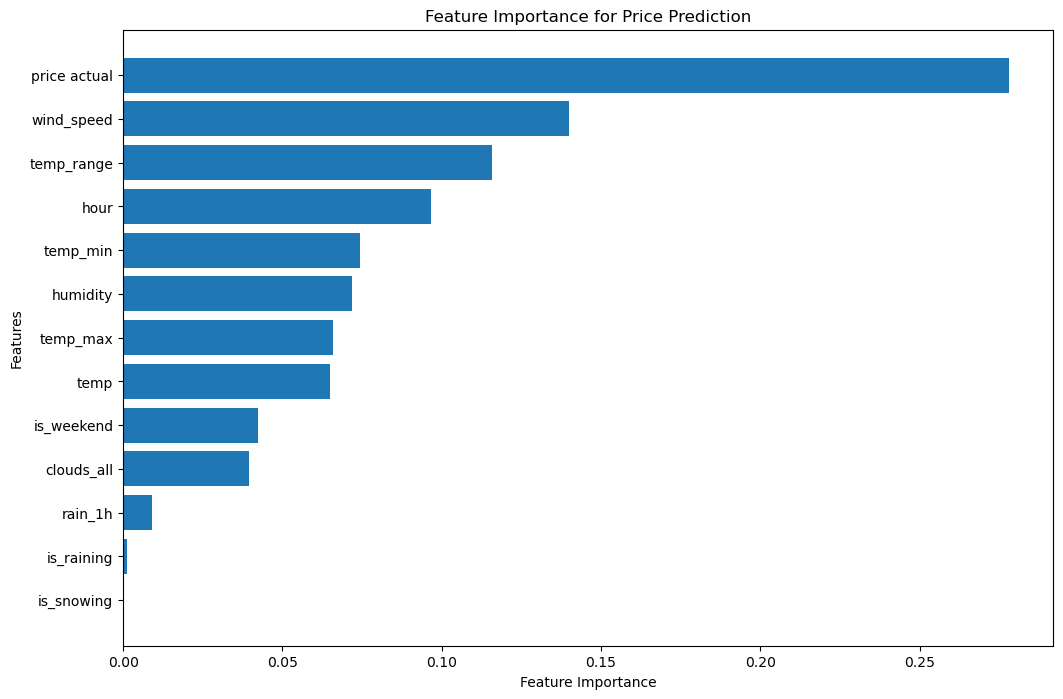

In [80]:
# Feature importance
feature_importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Price Prediction')
plt.gca().invert_yaxis()
plt.show()

Important Variables for Price model


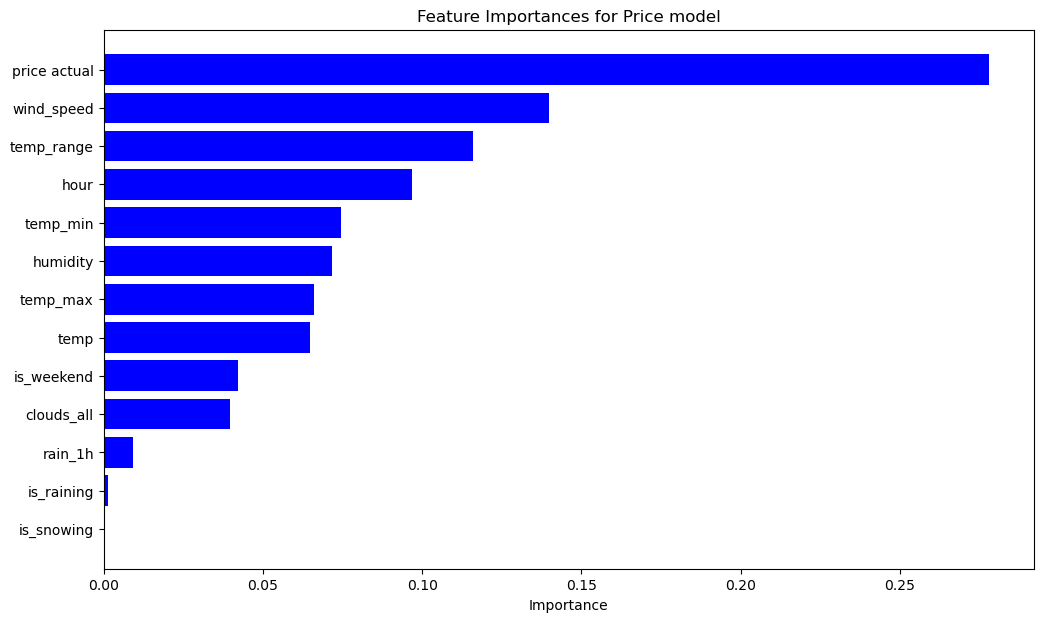

Important Variables for Price model (sorted by importance):
is_snowing, is_raining, rain_1h, clouds_all, is_weekend, temp, temp_max, humidity, temp_min, hour, temp_range, wind_speed, price actual


In [86]:
# Plot feature importances for Price model
print("Important Variables for Price model")

importances_price = best_model.feature_importances_
features_price = X_test.columns

# Get the indices that would sort the importances array
sorted_indices_price = np.argsort(importances_price)

# Sort the importances and features based on the sorted indices
sorted_importances_price = importances_price[sorted_indices_price]
sorted_features_price = features_price[sorted_indices_price]

plt.figure(figsize=(12, 7))
plt.barh(sorted_features_price, sorted_importances_price, color='blue')
plt.title('Feature Importances for Price model')
plt.xlabel('Importance')
plt.show()

print("Important Variables for Price model (sorted by importance):")
print(", ".join(sorted_features_price))

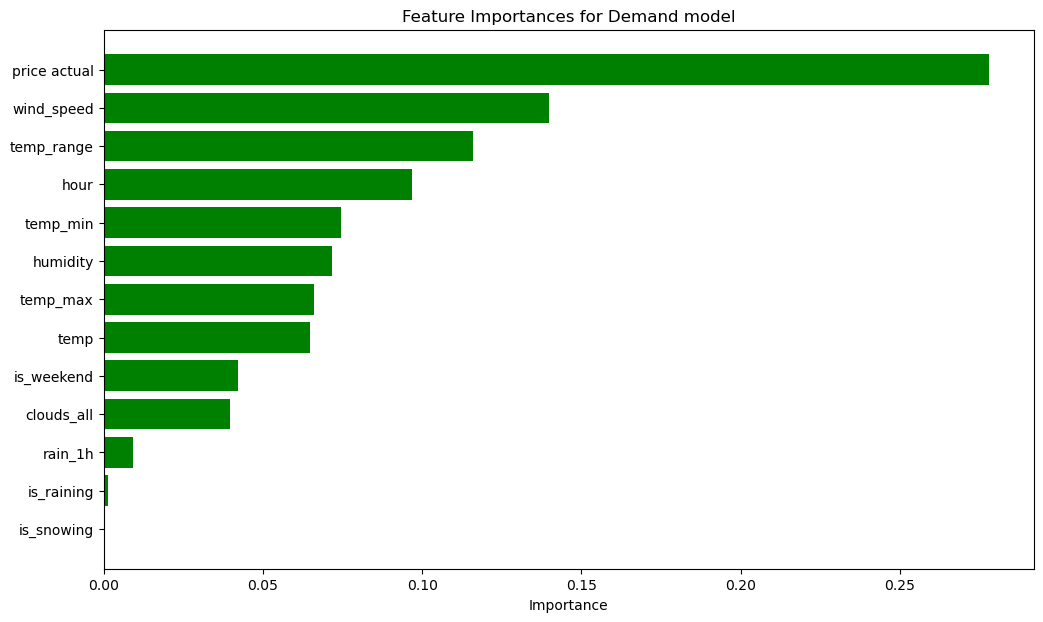

Important Variables for Demand model (sorted by importance):
is_snowing, is_raining, rain_1h, clouds_all, is_weekend, temp, temp_max, humidity, temp_min, hour, temp_range, wind_speed, price actual


In [91]:
# Assuming best_rf_model_demand is the best Random Forest model for demand prediction
importances_demand = best_model.feature_importances_
features_demand = X_test.columns

# Get the indices that would sort the importances array
sorted_indices_demand = np.argsort(importances_demand)

# Sort the importances and features based on the sorted indices
sorted_importances_demand = importances_demand[sorted_indices_demand]
sorted_features_demand = features_demand[sorted_indices_demand]

plt.figure(figsize=(12, 7))
plt.barh(sorted_features_demand, sorted_importances_demand, color='green')
plt.title('Feature Importances for Demand model')
plt.xlabel('Importance')
plt.show()

print("Important Variables for Demand model (sorted by importance):")
print(", ".join(sorted_features_demand))

Actual vs Predicted Electricity Price


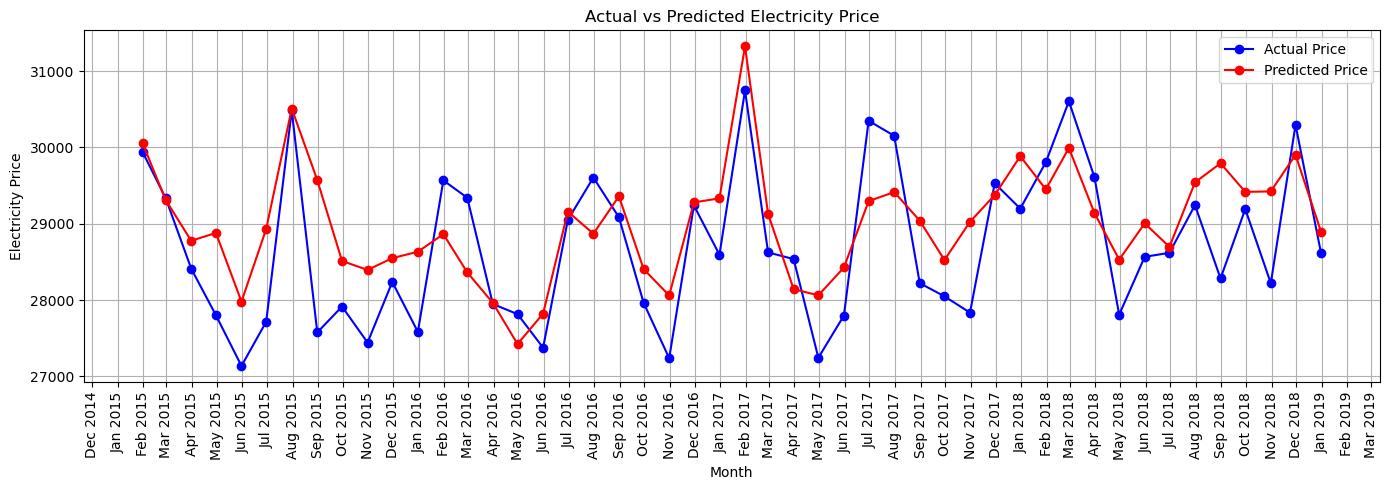

In [111]:
# Assuming you have trained and tuned the best Random Forest model and have X_test_price, y_test_rescaled, and y_pred_rescaled defined

# Actual vs Predicted Electricity Price
print("Actual vs Predicted Electricity Price")

test_indices_price = X_test.index

# Assuming merged_df has the 'time' column

# Get the corresponding dates for the test set
test_dates_price = merged_df.loc[test_indices_price, 'time']

# Convert test_dates_price to datetime if not already
test_dates_price = pd.to_datetime(test_dates_price)

# Reshape y_test_rescaled and y_pred_rescaled to 1D arrays if necessary
y_test_rescaled = y_test.ravel()  # Use ravel() to flatten the array
y_pred_rescaled = y_pred.ravel()  # Use ravel() to flatten the array

# Create a DataFrame with the dates, actual, and predicted values
results_price_df = pd.DataFrame({'Date': test_dates_price, 'Actual': y_test_rescaled , 'Predicted': y_pred_rescaled })

# Set Date as the index
results_price_df.set_index('Date', inplace=True)

# Group by month and calculate the mean for each month
monthly_results_price = results_price_df.resample('M').mean()

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(monthly_results_price.index, monthly_results_price['Actual'], label='Actual Price', color='blue', marker='o')
plt.plot(monthly_results_price.index, monthly_results_price['Predicted'], label='Predicted Price', color='red', marker='o')
plt.title('Actual vs Predicted Electricity Price')
plt.xlabel('Month')
plt.ylabel('Electricity Price')
plt.legend()
plt.grid(True)

# Format the x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Actual vs Predicted Electricity Demand


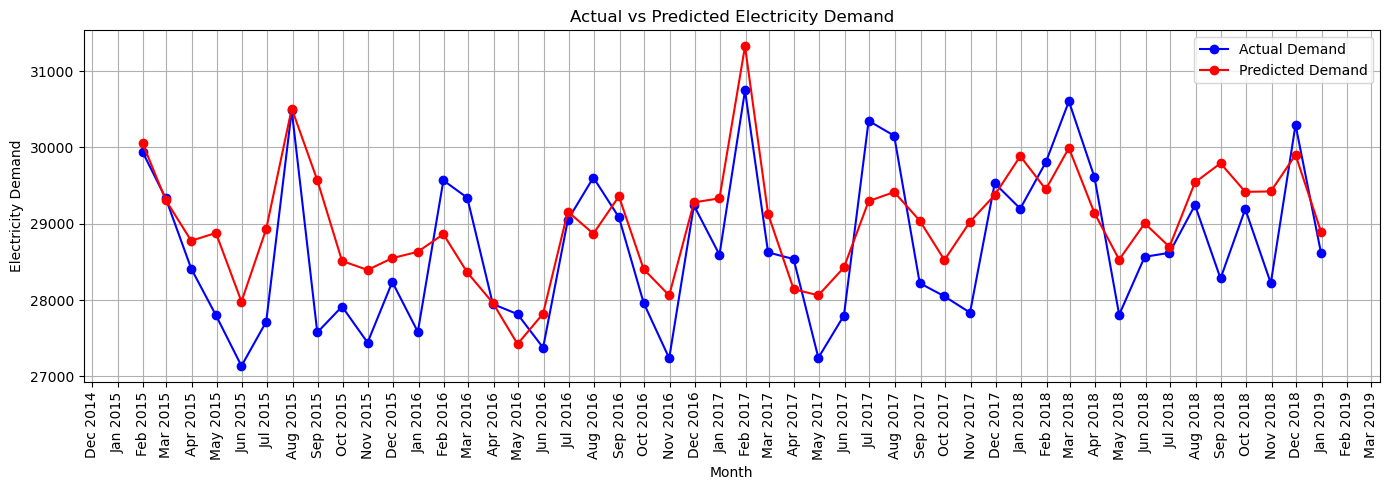

In [115]:
# Assuming you have trained and tuned the best Random Forest model and have X_test_demand, y_test, and y_pred defined

# Actual vs Predicted Electricity Demand
print("Actual vs Predicted Electricity Demand")

test_indices_demand = X_test.index

# Assuming merged_df has the 'time' column

# Get the corresponding dates for the test set
test_dates_demand = merged_df.loc[test_indices_demand, 'time']

# Convert test_dates_demand to datetime if not already
test_dates_demand = pd.to_datetime(test_dates_demand)

# Flatten y_test and y_pred if necessary
y_test = y_test.ravel()  # Ensure y_test is 1-dimensional
y_pred = y_pred.ravel()  # Ensure y_pred is 1-dimensional

# Create a DataFrame with the dates, actual, and predicted values
results_demand_df = pd.DataFrame({'Date': test_dates_demand, 'Actual': y_test, 'Predicted': y_pred})

# Set Date as the index
results_demand_df.set_index('Date', inplace=True)

# Group by month and calculate the mean for each month
monthly_results_demand = results_demand_df.resample('M').mean()

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(monthly_results_demand.index, monthly_results_demand['Actual'], label='Actual Demand', color='blue', marker='o')
plt.plot(monthly_results_demand.index, monthly_results_demand['Predicted'], label='Predicted Demand', color='red', marker='o')
plt.title('Actual vs Predicted Electricity Demand')
plt.xlabel('Month')
plt.ylabel('Electricity Demand')
plt.legend()
plt.grid(True)

# Format the x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Actual vs Predicted Electricity Price ['bold']


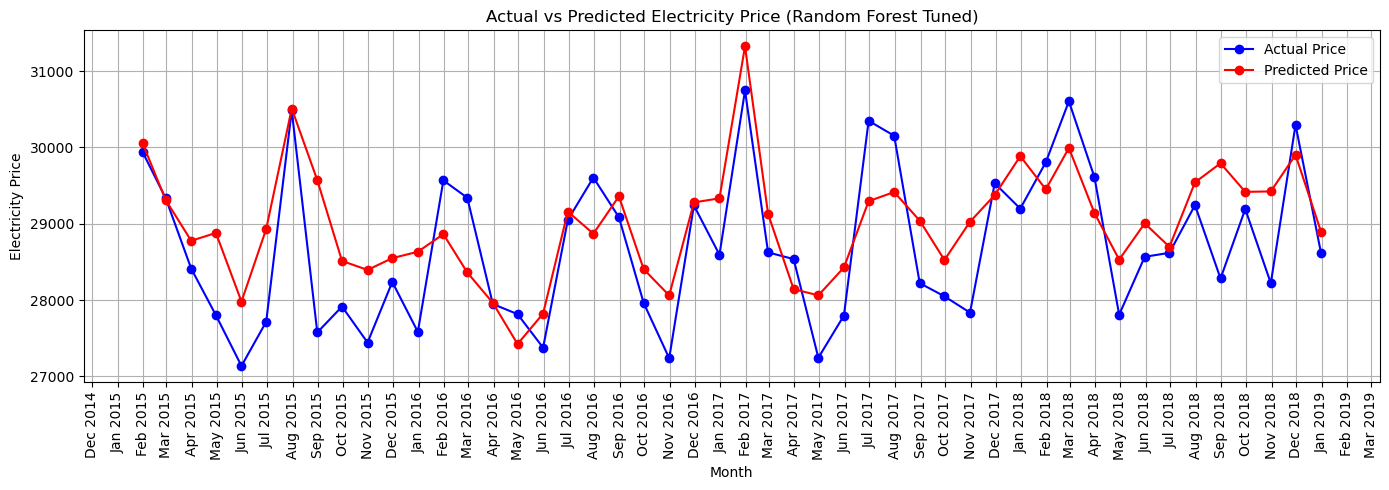

In [119]:
# Assuming you have trained and tuned the best Random Forest model and have X_test_price, y_test, and y_pred defined

# Actual vs Predicted Electricity Price
print("Actual vs Predicted Electricity Price", ['bold'])

# Get test indices
test_indices = X_test.index

# Get the corresponding dates for the test set
test_dates = merged_df.loc[test_indices, 'time']

# Convert test_dates to datetime if not already
test_dates = pd.to_datetime(test_dates)

# Flatten y_test and y_pred if necessary
y_test = y_test.ravel()  # Ensure y_test is 1-dimensional
y_pred = y_pred.ravel()  # Ensure y_pred is 1-dimensional

# Create a DataFrame with the dates, actual, and predicted values
results_df = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Predicted': y_pred})

# Set Date as the index
results_df.set_index('Date', inplace=True)

# Group by month and calculate the mean for each month
monthly_results = results_df.resample('M').mean()

# Create the plot
plt.figure(figsize=(14, 5))
plt.plot(monthly_results.index, monthly_results['Actual'], label='Actual Price', color='blue', marker='o')
plt.plot(monthly_results.index, monthly_results['Predicted'], label='Predicted Price', color='red', marker='o')
plt.title('Actual vs Predicted Electricity Price (Random Forest Tuned)')
plt.xlabel('Month')
plt.ylabel('Electricity Price')
plt.legend()
plt.grid(True)

# Format the x-axis to show month and year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
